In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((x_train.shape[0], num_pixels)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], num_pixels)).astype('float32')
x_train/=255
x_test/=255
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [3]:
train = pd.read_csv(r"C:\Users\srstu\Documents\jupyter notebook\Digit recognizer\train.csv")
test = pd.read_csv(r"C:\Users\srstu\Documents\jupyter notebook\Digit recognizer\test.csv")

In [4]:
Y_train = train['label']
X_train = train.drop('label',axis=1)
test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [5]:
X_train /=255
test/=255

In [6]:
X_train.shape

(42000, 784)

In [7]:
Y_train.shape

(42000,)

In [8]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
X_train.max()

1.0

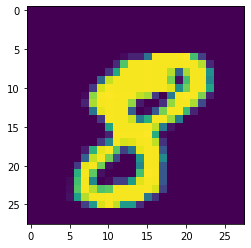

In [9]:
plt.imshow(X_train[10][:,:,0])

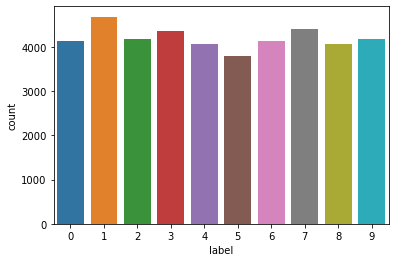

In [10]:
sns.countplot(Y_train)

Here all output have almost equal number of examples

In [11]:
# X_train=np.concatenate((X_train, x_train,x_test), axis=0)
# Y_train=np.concatenate((Y_train, y_train,y_test), axis=0)
Y_train = to_categorical(Y_train,num_classes=10)

In [12]:
Y_train.shape

(42000, 10)

In [13]:
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size = 0.05, random_state=2)

In [14]:
print(X_train.shape , x_train.shape)
print(Y_train.shape, y_train.shape)

(39900, 28, 28, 1) (60000, 28, 28, 1)
(39900, 10) (60000,)


In [15]:
X_train.shape

(39900, 28, 28, 1)

[[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out .. .then complie it with an optimizer (rmsprop,sgd,adam etc)


In [16]:
# model = Sequential()

# model.add(Conv2D(filters=64, kernel_size = (5,5), padding='Same' ,activation = 'relu', input_shape=(28,28,1)))
# model.add(Conv2D(filters=64, kernel_size = (5,5), padding= 'Same', activation = 'relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# # model.add(Dropout(0.25))
# model.add(BatchNormalization())

# model.add(Conv2D(filters=32, kernel_size = (5,5), padding='Same' ,activation = 'relu'))
# model.add(Conv2D(filters=32, kernel_size = (3,3), padding= 'Same', activation = 'relu'))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Dropout(0.20))

# model.add(Flatten())

# model.add(Dense(256,activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# model.add(Dense(256,activation='relu'))
# model.add(BatchNormalization())
# # model.add(Dropout(0.1))

# # model.add(Dense(128,activation='relu'))
# # # model.add(BatchNormalization())
# # model.add(Dropout(0.25))

# # model.add(Dense(128,activation='relu'))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.1))

# model.add(Dense(10,activation='softmax'))


In [17]:
lenetmodel = Sequential()
lenetmodel.add(Conv2D(filters=8, kernel_size = (5,5), padding='Same' ,activation = 'relu', input_shape=(28,28,1)))
lenetmodel.add(MaxPool2D(pool_size=(2,2)))

lenetmodel.add(Conv2D(filters=16, kernel_size = (5,5), padding='Valid' ,activation = 'relu'))
lenetmodel.add(MaxPool2D(pool_size=(2,2)))

lenetmodel.add(Flatten())

lenetmodel.add(Dense(120,activation='relu'))
lenetmodel.add(Dense(84,activation='relu'))
lenetmodel.add(Dense(10,activation='relu'))

In [18]:
# optimizer = RMSprop(lr =0.001 ,rho=0.9, epsilon=1e-08,decay=0.0)
optimizer = Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [19]:
# model.compile(optimizer=optimizer , loss='categorical_crossentropy', metrics=["accuracy"])
lenetmodel.compile(optimizer=optimizer , loss='categorical_crossentropy' , metrics=["accuracy"])

In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000001)

In [21]:
epochs = 20
batch_size = 64

In [ ]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)
history = lenetmodel.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
# history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = (X_val,Y_val),
#                               verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
#                               , callbacks=[learning_rate_reduction])

Epoch 1/20
 - 10s - loss: 1.9824 - accuracy: 0.4335 - val_loss: 0.9307 - val_accuracy: 0.8376
Epoch 2/20
 - 8s - loss: 3.3236 - accuracy: 0.4119 - val_loss: 4.8132 - val_accuracy: 0.1052
Epoch 3/20
 - 7s - loss: 2.8032 - accuracy: 0.3697 - val_loss: 1.0638 - val_accuracy: 0.7776

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001500000013038516.
Epoch 4/20
 - 7s - loss: 1.3940 - accuracy: 0.5760 - val_loss: 0.9418 - val_accuracy: 0.8014
Epoch 5/20
 - 7s - loss: 1.5216 - accuracy: 0.4459 - val_loss: 0.8528 - val_accuracy: 0.7933

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.000750000006519258.
Epoch 6/20
 - 8s - loss: 1.2455 - accuracy: 0.6884 - val_loss: 0.8807 - val_accuracy: 0.8157
Epoch 7/20
 - 7s - loss: 1.1297 - accuracy: 0.7082 - val_loss: 0.6744 - val_accuracy: 0.8810
Epoch 8/20


In [ ]:
# history1 = model.fit(X_train,Y_train ,batch_size=batch_size ,epochs=epochs,
#                     verbose=2 , validation_data=(X_val,Y_val), callbacks=[learning_rate_reduction])

In [ ]:
fig ,ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'] , color='b' , label ='Training loss')
ax[0].plot(history.history['val_loss'] , color='r' , label='Validation loss')

legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


In [ ]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

In [ ]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
# Display some error results 
import math
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = math.ceil(errors_index.shape[0]/3)
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [ ]:
import math
math.ceil(5/2)